# Exercise 0 - Getting started (15 Points)

<div>
<img src="images/python-logo.png" width="100"/>
</div>

This exercise is meant to get you familiar with Python. Most of the following exercises are inspired by the highly recommended lecture "Skriptsprachen und Anwendungen (ASQ)" (FMI-BI0058) by Emanuel Barth.

In the event of a persistent problem, do not hesitate to contact the course instructors under
- paul.kahlmeyer@uni-jena.de

### Submission

- Deadline of submission:
        x.y.z
- Submission on [moodle page](https://moodle.uni-jena.de/course/view.php?id=18310)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

## Variables, Types

In this lab, we will mostly use two basic types of variables: **numbers** and **strings**. These variables can be grouped in [**lists**](https://www.w3schools.com/python/python_lists.asp), [**dictionaries**](https://www.w3schools.com/python/python_dictionaries.asp) or [**sets**](https://www.w3schools.com/python/python_sets.asp).

### Task 1 (1 Point)

Create several variables:
- `x` has the value of 3
- `y` has the value of $2^{100}$
- `a` is a string with the text "pretty little string"
- `l` is a list, that holds `x,y` and `a`
- `d` is a dictionary with the name and phone number of three (imaginary) people
- `s` is a set with 5 numbers

In [2]:
# TODO: create variables
x = 3
y = 2**100
a = "pretty little string"
l = [x,y,a]
d = {
    'Person1' : 1234,
    'Person2' : 4231,
    'Person3' : 1324
}
s = set([1,2,3,4,5])
s = {1,2,3,4,5}

## Branches and Loops

Similar to other programming languages, Python has [**for**](https://www.w3schools.com/python/python_for_loops.asp)- and [**while**](https://www.w3schools.com/python/python_while_loops.asp)- loops, as well as [**if-else**](https://www.w3schools.com/python/python_conditions.asp) conditioning.

### Task 2 (1 Point)
Use a for loop to iterate over the dictionary `d` and print the persons and their phone numbers.

In [3]:
# TODO: iterate over d
for p in d:
    print(f'Person: {p}\tNumber: {d[p]}')

Person: Person1	Number: 1234
Person: Person2	Number: 4231
Person: Person3	Number: 1324


### Task 3 (1 Points)
Use a for loop to iterate over the set `s` and print only the even numbers.

In [4]:
# TODO: iterate over s, print even numbers
for i in s:
    if i%2==0:
        print(i)

2
4


In [5]:
[x for x in s if x%2==0]

[2, 4]

### Task 4 (2 Points)
Calculate the first 10 powers of 2: ($2^0,2^1,2^2,\dots,2^9)$ 
and store them in a list
- using a for loop
- using a while loop

Compare the results.

In [6]:
# TODO: print first 10 powers of 2 with for loop
l1 = [2**i for i in range(10)]

# TODO: print first 10 powers of 2 with while loop
l2 = []
i = 0
while i<10:
    l2.append(2**i)
    i += 1
    
assert l1 == l2

[Functions](https://www.w3schools.com/python/python_functions.asp) are a convenient way to encapsulate calculation steps.

### Task 5 (2 Points)
Create a function, that returns a list of the first $n$ [fibonacci numbers](https://en.wikipedia.org/wiki/Fibonacci_number).

In [7]:
# TODO: write function, that outputs list of first n fibonacci numbers
def fib(n):
    if n == 1:
        return [0]
    elif n == 2:
        return [0,1]
    else: 
        i = 2
        ret = [0,1]
        while i < n:
            ret.append(ret[-1]+ret[-2])
            i += 1
        return ret
    
fib(4)

[0, 1, 1, 2]

## Classes

[**Classes**](https://www.w3schools.com/python/python_classes.asp) are a convenient way to group calculations and attributes into a single instance. In this lab we will use classes to represent algorithms.

Below you find an example for an iterative algorithm, that calculates the [moving average](https://en.wikipedia.org/wiki/Moving_average) for a sequence of numbers.

In [8]:
class moving_average():
    def __init__(self, k):
        self.k = k
        self.datapoints = None
        self.averages = None
        
    def mean(self, datapoints):
        return sum(datapoints)/len(datapoints)
        
    def fit(self,datapoints):
        self.datapoints = datapoints
        self.averages = []
        if self.k < len(self.datapoints):
            for i in range(len(self.datapoints)-self.k+1): # here was an error
                avg = self.mean(self.datapoints[i:i+self.k])
                self.averages.append(avg)

### Task 6 (1 Point)

Create a toy dataset and use the `moving_average` class to calculate the moving average.

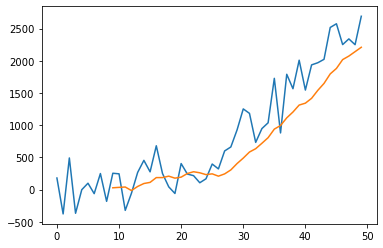

In [9]:
# TODO: create own dataset and use moving average
n = 50
k = 10

datapoints = np.arange(1,n+1,1)**2 + np.random.random(n)*1000-500
x_values = np.arange(0,n,1)


alg = moving_average(k)
alg.fit(datapoints)


plt.plot(x_values, datapoints)
plt.plot(x_values[k-1:],alg.averages)

### Task 7 (2 Points)

Create your own class that implements the (not efficient) approximation of pi from a [circle with known radius and area](https://academo.org/demos/estimating-pi-monte-carlo/). 

Use the [`random`](https://docs.python.org/3/library/random.html) package for the generation of random numbers. 

In [10]:
# TODO: Implement pi approximation within class
import math
class pi_approximation():
    
    def __init__(self):
        self.pi = None
        self.count = 0
        
        
    def fit(self, n_iterations=1000):
        for _ in range(n_iterations):
            x = random.random()*2-1
            y = random.random()*2-1
            if 1 > x**2+y**2:
                self.count += 1
        self.pi = 4*self.count/n_iterations
        
alg = pi_approximation()
alg.fit(1000000)
alg.pi

3.14036

In [11]:
# Area of unit circle: pi*r^2 = pi
# Area of square around unit circle = 2^2 = 4
# Probability that point sampled from square is in circle = Area_circle / Area_square = pi/4
# Approximate probability trough random experiment

# Point in circle, if norm <=1 (number is <=1 <-> root is <=1)

## Numpy and Matplotlib

In the context of scientific computing, [NumPy](https://numpy.org/) is probably the most important package in Python. 

### Task 8 (1 Point)
Install and import numpy. Create a numpy array with 10 numbers. Multiply this array by 10 and calculate the mean of the array.

In [12]:
# TODO: create numpy array, multiply by 10 and calculate mean
a = np.random.rand(10)
np.mean(a*10)

6.212096176970164

[Matplotlib](https://matplotlib.org/) is a package for plotting and visualization in Python.

### Task 9 (2 Points)

Use numpy to calculate the function 
\begin{equation}
f(x) = x^2-10\sin(2x)
\end{equation}
for $x=1,\dots,50$. 

Use matplotlib to draw the function.

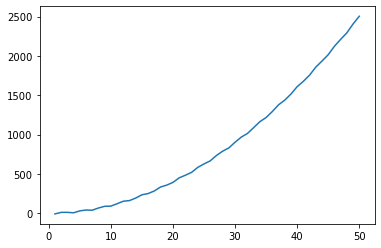

In [13]:
# TODO: calculate and plot the function values
def f(x):
    return x**2-10*np.sin(2*x)

x_values = np.arange(1,51,1)
y_values = f(x_values)

plt.plot(x_values, y_values)

## Tower of Hanoi

The [Tower of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi) is a mathematical puzzle, that consists of three rods and a tower of disks. The goal is to transport the tower of disks from the first rod to the third rod while following the rules:
- only one disk can be moved at a time
- each move consists of taking the upper disk from one of the stacks and placing it on top of another stack or on an empty rod
- no larger disk may be placed on top of a smaller disk

### Task 10 (2 Points)

Create a function, that outputs the series of moves for a Tower of Hanoi with size $n$. 
As an example, the output for a tower of height 3 that is moved from rod 1 to rod 3 should be:

- Moving from 1 to 3.
- Moving from 1 to 2.
- Moving from 3 to 2.
- Moving from 1 to 3.
- Moving from 2 to 1.
- Moving from 2 to 3.
- Moving from 1 to 3.


In [14]:
# TODO: create and test function for towers of hanoi
def move_tower(height, source, dest):
    moves=[1,2,3]
    if height==1:
        print(f'Moving from {source} to {dest}.')
    elif height>0:
        free_rod = 6-source-dest # very elegant
        move_tower(height-1,source,free_rod)
        move_tower(1,source,dest)
        move_tower(height-1,free_rod,dest)
        
move_tower(3,1,3)

Moving from 1 to 3.
Moving from 1 to 2.
Moving from 3 to 2.
Moving from 1 to 3.
Moving from 2 to 1.
Moving from 2 to 3.
Moving from 1 to 3.
